In [3]:
def preprocess_comment(comment):
    # Tokenization
    tokens = nltk.word_tokenize(comment)

    # Remove URL/HTTP
    tokens = [re.sub(r'http\S+|www.\S+', '', token) for token in tokens]

    # Remove hashtags
    tokens = [token for token in tokens if not token.startswith('#')]

    # Remove usernames/user mentions
    tokens = [token for token in tokens if not token.startswith('@')]

    # Menghilangkan emotikon
    tokens = [re.sub(r'[^\w\s\d]', '', token) for token in tokens]

    # Remove symbols and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    # Lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords]

    # Join tokens back to a single string
    preprocessed_comment = ' '.join(tokens)

    return preprocessed_comment

In [4]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [7]:
df = pd.read_csv("Summarization 521 sentiment facebook appstore.csv", header=0, parse_dates=[0], index_col=0)
df['Summary'] = df['Summary'].apply(preprocess_comment)

In [8]:
df

,Original,Summary,Sentiment
0,"Upon opening the watch page, the first things ...",disturbs think children could stumbling upon s...,-1
1,My account has been hacked and my information ...,need create sure way contacted issue,-1
2,I think that my profile has been blocked from ...,need answers fix issue please,-1
3,Long-time user who no longer posts on the plat...,contacted support explanation thought possib...,-1
4,I did a experiment with posting liberal opinio...,hitler many years ago,-1
...,...,...,...
516,"I can't believe you guys, it's annoying to not...",guys starting like another platform used barel...,-1
517,I think they’re business model exploits human ...,say choose shop else happens good deals posted...,-1
518,The app and the entertainment its provides is ...,accounts platforms case go completely bonkers,-1
519,I’ve recently gotten a new phone and i had to ...,im trying login account tried every password ...,-1


In [10]:
# Separate each sample based on sentiment
positive_df = df[df['Sentiment'] == 1]
neutral_df = df[df['Sentiment'] == 0]
negative_df = df[df['Sentiment'] == -1]


Topik ke- 1
marketplace how jokes issues interacting

Topik ke- 2
marketplace how jokes issues interacting

Topik ke- 3
to and facebook it is



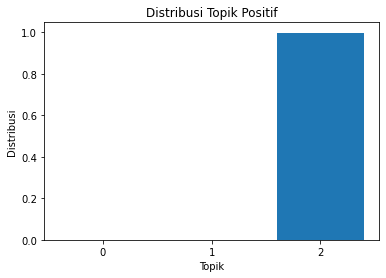

In [18]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_positif = ' '.join(positive_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_positif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Positif')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
now fix mode messenger media

Topik ke- 2
the it and to that

Topik ke- 3
now fix mode messenger media



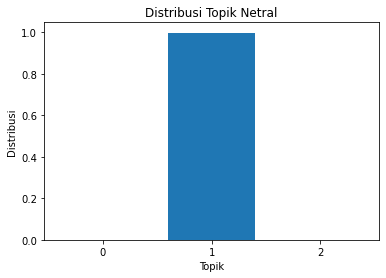

In [19]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_netral = ' '.join(neutral_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_netral])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Netral')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
zuckerberg fighting important incite incompetent

Topik ke- 2
and the to it my

Topik ke- 3
zuckerberg fighting important incite incompetent



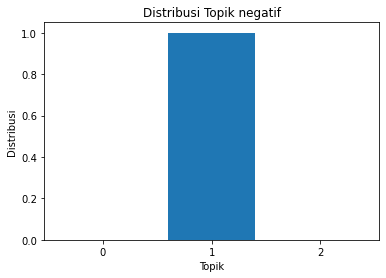

In [20]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_negatif = ' '.join(negative_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_negatif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik negatif')
plt.xticks(range(num_topics))
plt.show()

YearMonth: 2020-01
Topik ke- 1
would whole app choose crash

Topik ke- 2
upload would pictures app choose

Topik ke- 3
would whole app choose crash



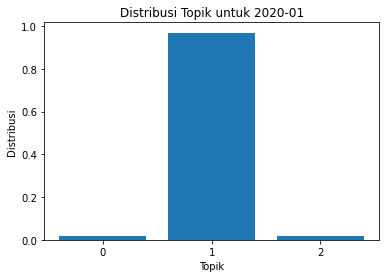


YearMonth: 2020-02
Topik ke- 1
see members life family events

Topik ke- 2
see members life family events

Topik ke- 3
see members life family events



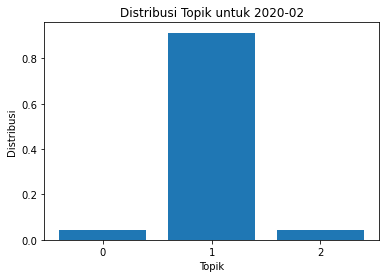


YearMonth: 2020-03
Topik ke- 1
post take something one nt

Topik ke- 2
take something one nt notification

Topik ke- 3
take something one nt notification



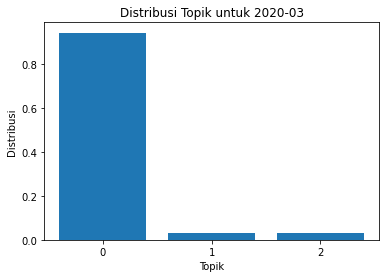


YearMonth: 2020-04
Topik ke- 1
memes make lot laugh know

Topik ke- 2
memes make lot laugh know

Topik ke- 3
memes make lot laugh know



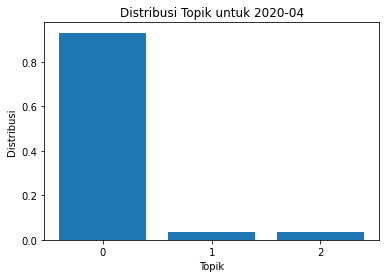


YearMonth: 2020-05
Topik ke- 1
years app glitching

Topik ke- 2
glitching app years

Topik ke- 3
glitching app years



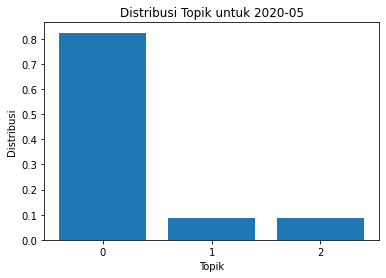


YearMonth: 2020-06
Topik ke- 1
worst use promote need market

Topik ke- 2
worst use promote need market

Topik ke- 3
worst use promote need market



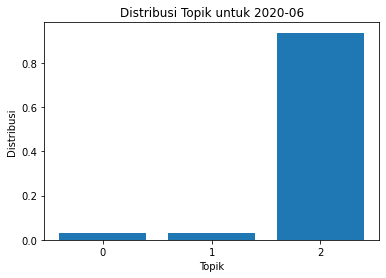


YearMonth: 2020-07
Topik ke- 1
wonder complication middle life latest

Topik ke- 2
update get wonder complication life

Topik ke- 3
wonder complication middle life latest



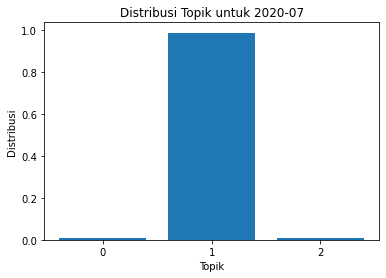


YearMonth: 2020-08
Topik ke- 1
think supposed ad ads angry

Topik ke- 2
think supposed ad ads angry

Topik ke- 3
many think get ad ads



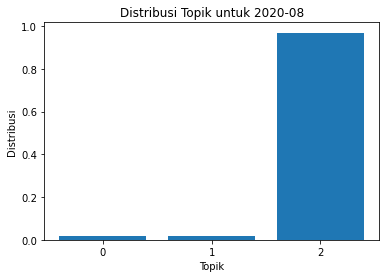


YearMonth: 2020-09
Topik ke- 1
wifi using twice tried times

Topik ke- 2
wifi using twice tried times

Topik ke- 3
wifi using twice tried times



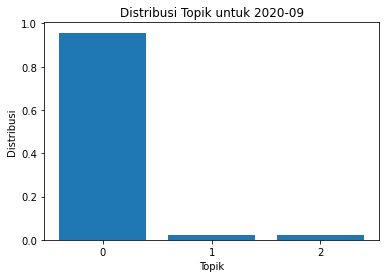


YearMonth: 2020-10
Topik ke- 1
selling removed pending messages like

Topik ke- 2
selling messages items button app

Topik ke- 3
selling removed pending messages like



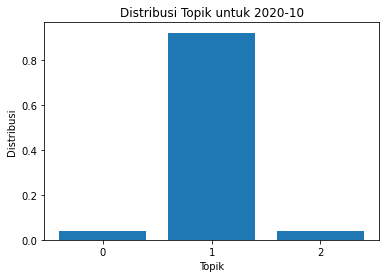


YearMonth: 2020-11
Topik ke- 1
deleted app reinstalled

Topik ke- 2
reinstalled app deleted

Topik ke- 3
reinstalled app deleted



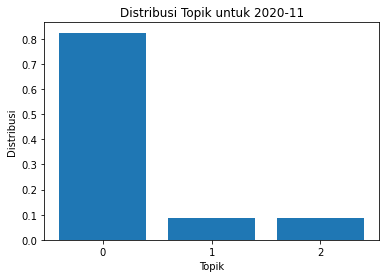


YearMonth: 2020-12
Topik ke- 1
year verification understand something provided

Topik ke- 2
year verification understand something provided

Topik ke- 3
year verification understand something provided



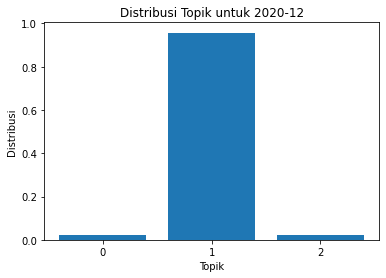


YearMonth: 2021-01
Topik ke- 1
version update though tells feature

Topik ke- 2
version update though tells feature

Topik ke- 3
version update though tells feature



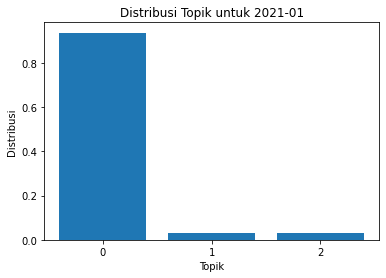


YearMonth: 2021-02
Topik ke- 1
reliable relief leave use apps

Topik ke- 2
apps use relief leave reliable

Topik ke- 3
apps use relief leave reliable



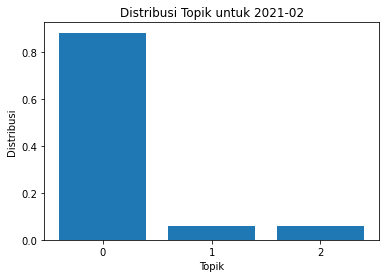


YearMonth: 2021-03
Topik ke- 1
really works well want normally

Topik ke- 2
works well want normally love

Topik ke- 3
works well want normally love



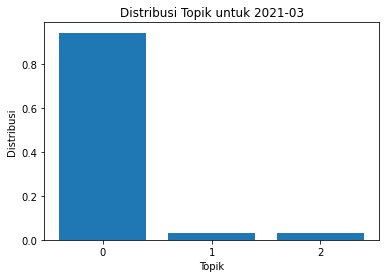


YearMonth: 2021-04
Topik ke- 1
text sensitive saying hope get

Topik ke- 2
text sensitive saying hope get

Topik ke- 3
text sensitive saying hope get



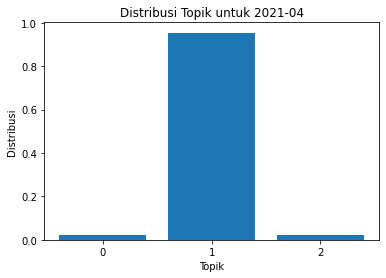


YearMonth: 2021-05
Topik ke- 1
think privacy may items friends

Topik ke- 2
think privacy may items friends

Topik ke- 3
think privacy may items friends



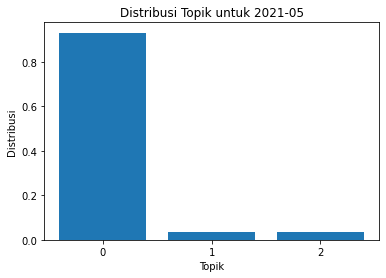


YearMonth: 2021-06
Topik ke- 1
supposed people connect

Topik ke- 2
connect people supposed

Topik ke- 3
connect supposed people



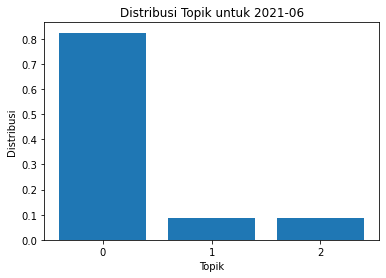


YearMonth: 2021-07
Topik ke- 1
years share previous people memories

Topik ke- 2
years share previous people memories

Topik ke- 3
years share previous people memories



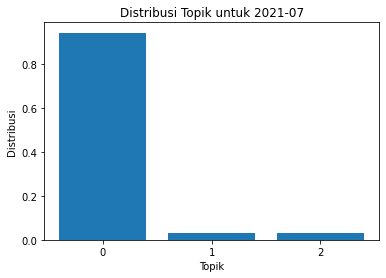


YearMonth: 2021-08
Topik ke- 1
facebook part done problem days

Topik ke- 2
facebook part done days problem

Topik ke- 3
problem days done part facebook



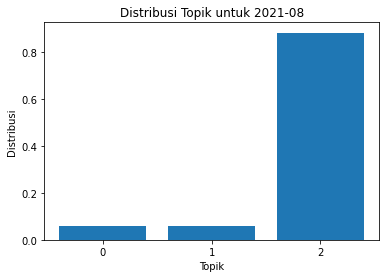


YearMonth: 2021-09
Topik ke- 1
right accountants everyone hate appear

Topik ke- 2
appear hate everyone right accountants

Topik ke- 3
right accountants everyone hate appear



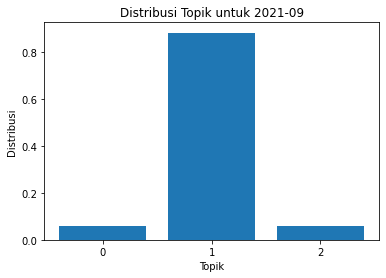


YearMonth: 2021-10
Topik ke- 1
violates tried said reviewed logging

Topik ke- 2
violates tried said reviewed logging

Topik ke- 3
violates tried said reviewed logging



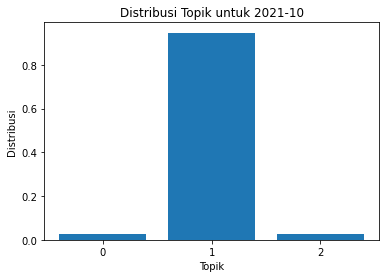


YearMonth: 2021-11
Topik ke- 1
wits messages issues internet installed

Topik ke- 2
deleted facebook see help name

Topik ke- 3
wits messages issues internet installed



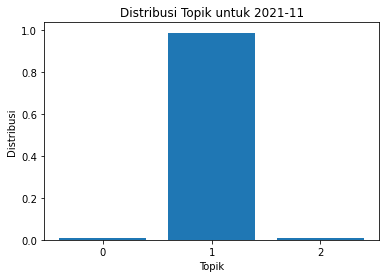


YearMonth: 2021-12
Topik ke- 1
supposedly put night middle made

Topik ke- 2
supposedly put night middle made

Topik ke- 3
supposedly put night middle made



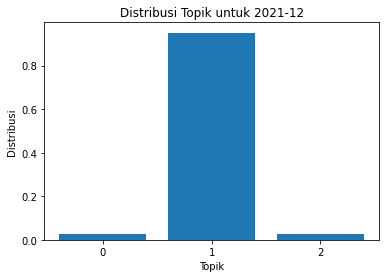


YearMonth: 2022-01
Topik ke- 1
slow new little getting features

Topik ke- 2
slow new little getting features

Topik ke- 3
slow new little getting features



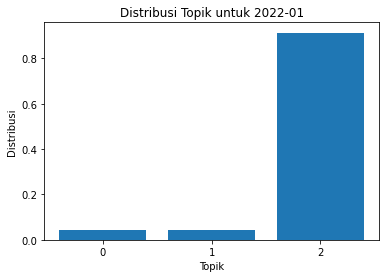


YearMonth: 2022-02
Topik ke- 1
tried tells submit situation review

Topik ke- 2
tried tells submit situation review

Topik ke- 3
appeal tells tried submit situation



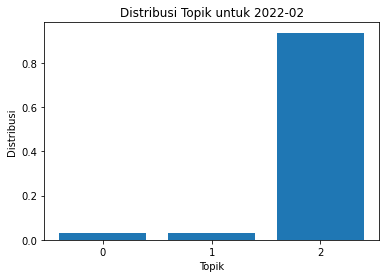


YearMonth: 2022-03
Topik ke- 1
app sided biased use one

Topik ke- 2
use sided one never biased

Topik ke- 3
use sided one never biased



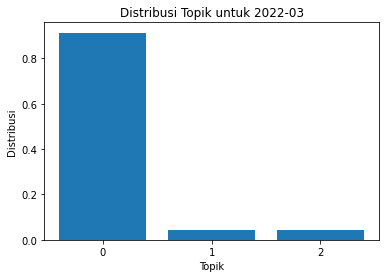


YearMonth: 2022-04
Topik ke- 1
something posted inappropriate hacked believe

Topik ke- 2
believe something posted inappropriate allegedly

Topik ke- 3
something posted inappropriate hacked believe



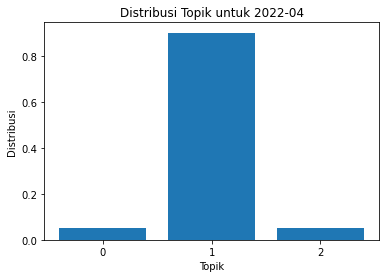


YearMonth: 2022-05
Topik ke- 1
fb accounts

Topik ke- 2
fb accounts

Topik ke- 3
accounts fb



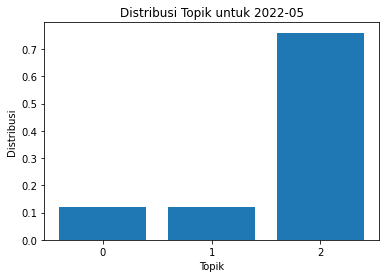


YearMonth: 2022-06
Topik ke- 1
tv shows said quoting people

Topik ke- 2
tv shows said quoting people

Topik ke- 3
tv shows said quoting people



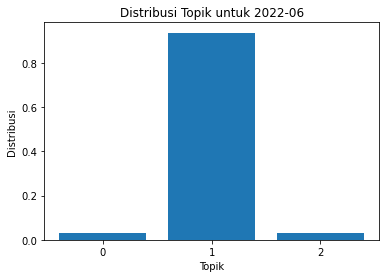


YearMonth: 2022-07
Topik ke- 1
form appeal go even anywhere

Topik ke- 2
go form even appeal anywhere

Topik ke- 3
form appeal go even anywhere



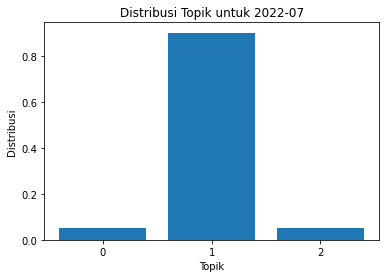


YearMonth: 2022-08
Topik ke- 1
facebook times update play many

Topik ke- 2
white flash night mode middle

Topik ke- 3
white flash night mode middle



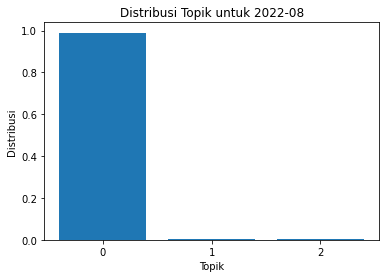


YearMonth: 2022-09
Topik ke- 1
notification red installing message messages

Topik ke- 2
notification red installing message messages

Topik ke- 3
little messager unread facebook icon



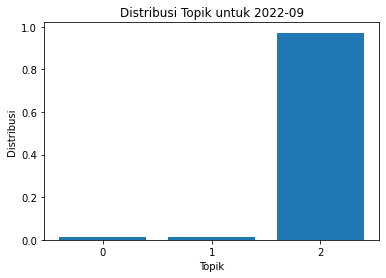


YearMonth: 2022-10
Topik ke- 1
support says reviewers review people

Topik ke- 2
support says reviewers review people

Topik ke- 3
support says reviewers review people



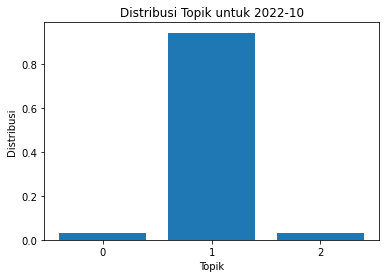


YearMonth: 2022-11
Topik ke- 1
language russian reason preferred lately

Topik ke- 2
russian reason preferred lately languages

Topik ke- 3
russian reason preferred lately languages



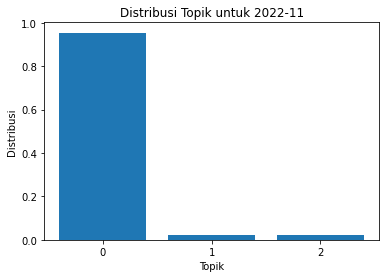


YearMonth: 2022-12
Topik ke- 1
messed fb yet things next

Topik ke- 2
yet next messed know fb

Topik ke- 3
yet things next messed know



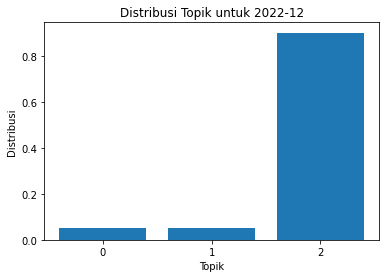


YearMonth: 2023-01
Topik ke- 1
feature worst absolutely come facebook

Topik ke- 2
feature worst absolutely come facebook

Topik ke- 3
facebook come worst absolutely feature



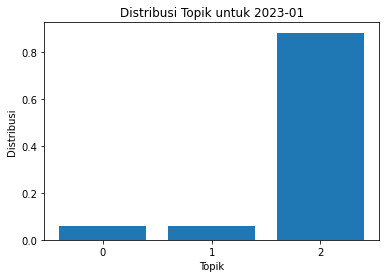


YearMonth: 2023-02
Topik ke- 1
works leave behind changing comments

Topik ke- 2
works leave behind changing comments

Topik ke- 3
version works leave behind changing



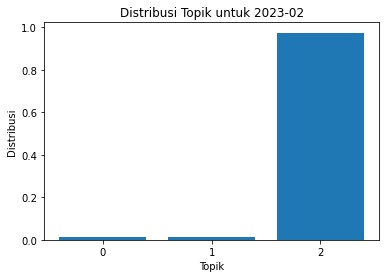


YearMonth: 2023-03
Topik ke- 1
violence violate apparently began cases

Topik ke- 2
many violence violate apparently began

Topik ke- 3
violence violate apparently began cases



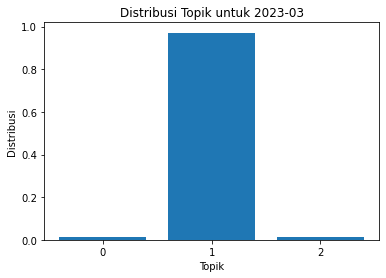


YearMonth: 2023-04
Topik ke- 1
use recently problems primarily posts

Topik ke- 2
use recently problems primarily posts

Topik ke- 3
issues groups facebook use recently



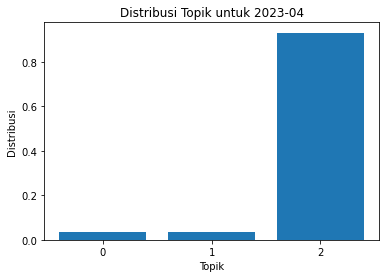


YearMonth: 2023-05
Topik ke- 1
watching trust recent plagued personal

Topik ke- 2
watching trust recent plagued personal

Topik ke- 3
watching trust recent plagued personal



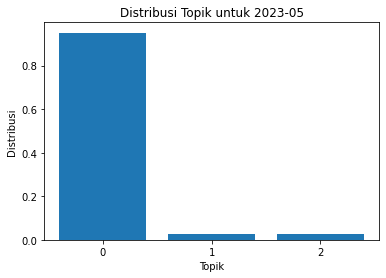

In [4]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

for index, row in df.iterrows():
    year_month = row['Month']
    text = row['Summary']

    # Membangun matriks frekuensi kata
    X = vectorizer.fit_transform([text])

    # Melatih model LDA
    num_topics = 3  # Jumlah topik yang diinginkan
    lda_model = LDA(n_components=num_topics)
    lda_model.fit(X)

    # Menampilkan kata-kata kunci untuk setiap topik
    feature_names = vectorizer.get_feature_names_out()
    print("YearMonth:", year_month)
    for topic_idx, topic in enumerate(lda_model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        print("Topik ke-", topic_idx+1)
        print(" ".join(keywords))
        print()

    # Visualisasi distribusi topik
    topic_distribution = lda_model.transform(X)
    plt.bar(range(num_topics), topic_distribution[0], align='center')
    plt.xlabel('Topik')
    plt.ylabel('Distribusi')
    plt.title('Distribusi Topik untuk ' + year_month)
    plt.xticks(range(num_topics))
    plt.show()
    print()
    print("==============================================")

Topik ke- 1
facebook app even get many

Topik ke- 2
yet happens good got government

Topik ke- 3
yet happens good got government



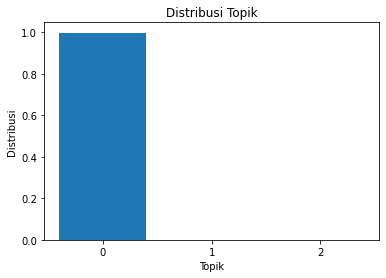

In [5]:
# Menggabungkan semua teks menjadi satu
keseluruhan_kalimat = ' '.join(df['Summary'])

X = vectorizer.fit_transform([keseluruhan_kalimat])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik')
plt.xticks(range(num_topics))
plt.show()